# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [110]:
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.utils import resample
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [111]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [112]:
fraud.shape

(1000000, 8)

In [113]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [114]:
fraud.fraud.value_counts()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

Around 9% of the people are fraudulent. Which means we are dealing with an imbalanced dataset.

Train LogisticRegression

In [115]:
features = fraud.drop(columns=['fraud'])
target =  fraud['fraud']

In [116]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target)

In [117]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [118]:
log_reg = LogisticRegression()

log_reg.fit(X_train_scaled, y_train)


LogisticRegression()

In [119]:
log_reg.score(X_test_scaled, y_test)

0.958156

In [120]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    228047
         1.0       0.89      0.60      0.72     21953

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.95    250000



# Oversampling

In [121]:
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)

In [122]:
train['fraud'] = y_train.values

In [123]:
fraud = train[train["fraud"] == 1]
no_fraud = train[train["fraud"] == 0]

In [124]:
yes_diabetes_oversampled = resample(fraud, 
                                    replace=True, 
                                    n_samples = len(no_fraud),
                                    random_state=0)

In [125]:
train_over = pd.concat([yes_diabetes_oversampled, no_fraud])
train_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
31043,1.415963,-0.169872,0.471244,0.366631,-0.734193,-0.334744,0.733187,1.0
496314,1.478684,1.196975,-0.597746,0.366631,-0.734193,-0.334744,0.733187,1.0
485113,-0.293573,13.390801,-0.492417,0.366631,-0.734193,-0.334744,0.733187,1.0
599374,-0.090893,-0.069628,8.512191,0.366631,-0.734193,-0.334744,0.733187,1.0
522906,1.934323,0.068155,-0.023219,0.366631,-0.734193,-0.334744,0.733187,1.0
...,...,...,...,...,...,...,...,...
749994,-0.172921,0.039665,-0.105134,0.366631,-0.734193,2.987358,0.733187,0.0
749995,-0.355165,-0.210664,-0.585919,0.366631,1.362040,-0.334744,-1.363909,0.0
749997,-0.328124,-0.202297,0.290411,0.366631,1.362040,-0.334744,0.733187,0.0
749998,-0.390629,-0.218536,-0.356118,-2.727542,-0.734193,-0.334744,-1.363909,0.0


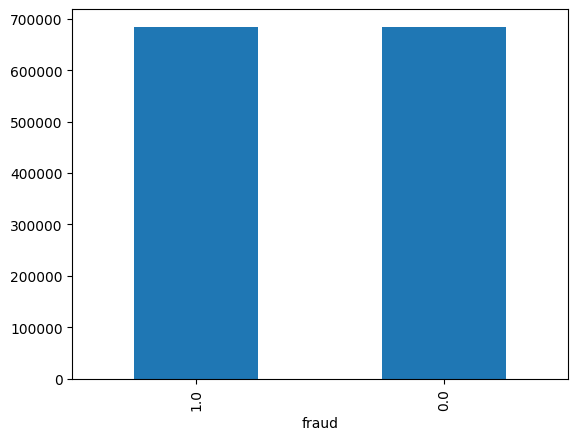

In [126]:
fraud_plt = train_over["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

In [127]:
X_train_over = train_over.drop(columns = ["fraud"])
y_train_over = train_over["fraud"]

In [128]:
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

LogisticRegression()

In [129]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

/Users/javi/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228047
         1.0       0.58      0.95      0.72     21953

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



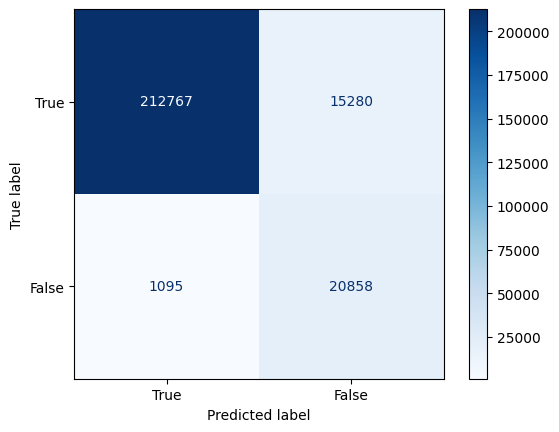

In [130]:
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[True, False])
disp.plot(cmap=plt.cm.Blues)

# Undersampling

In [131]:
no_diabetes_undersampled = resample(no_fraud, 
                                    replace=False, 
                                    n_samples = len(fraud),
                                    random_state=0)
no_diabetes_undersampled

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
578166,-0.279705,-0.148478,0.514060,0.366631,-0.734193,2.987358,0.733187,0.0
718210,-0.173798,-0.113610,-0.137748,0.366631,1.362040,-0.334744,-1.363909,0.0
234902,0.387138,-0.191547,-0.334550,0.366631,-0.734193,-0.334744,0.733187,0.0
586476,0.295348,-0.171278,-0.323071,0.366631,-0.734193,-0.334744,0.733187,0.0
520817,0.018260,0.073285,-0.048433,0.366631,1.362040,-0.334744,-1.363909,0.0
...,...,...,...,...,...,...,...,...
102493,1.018892,-0.198008,-0.475977,0.366631,1.362040,-0.334744,0.733187,0.0
564491,0.177931,-0.183600,-0.224077,0.366631,-0.734193,-0.334744,0.733187,0.0
372224,-0.371500,-0.216825,-0.514584,0.366631,-0.734193,2.987358,-1.363909,0.0
577147,-0.159617,-0.149626,-0.329502,0.366631,-0.734193,-0.334744,-1.363909,0.0


In [132]:
train_under = pd.concat([no_diabetes_undersampled, fraud])
train_under

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
578166,-0.279705,-0.148478,0.514060,0.366631,-0.734193,2.987358,0.733187,0.0
718210,-0.173798,-0.113610,-0.137748,0.366631,1.362040,-0.334744,-1.363909,0.0
234902,0.387138,-0.191547,-0.334550,0.366631,-0.734193,-0.334744,0.733187,0.0
586476,0.295348,-0.171278,-0.323071,0.366631,-0.734193,-0.334744,0.733187,0.0
520817,0.018260,0.073285,-0.048433,0.366631,1.362040,-0.334744,-1.363909,0.0
...,...,...,...,...,...,...,...,...
749960,-0.186449,-0.204278,1.300385,0.366631,-0.734193,-0.334744,0.733187,1.0
749983,1.477585,1.698300,-0.240699,0.366631,-0.734193,-0.334744,0.733187,1.0
749991,-0.378937,-0.185423,0.780416,0.366631,-0.734193,-0.334744,0.733187,1.0
749992,-0.393653,-0.070769,0.786886,-2.727542,-0.734193,-0.334744,0.733187,1.0


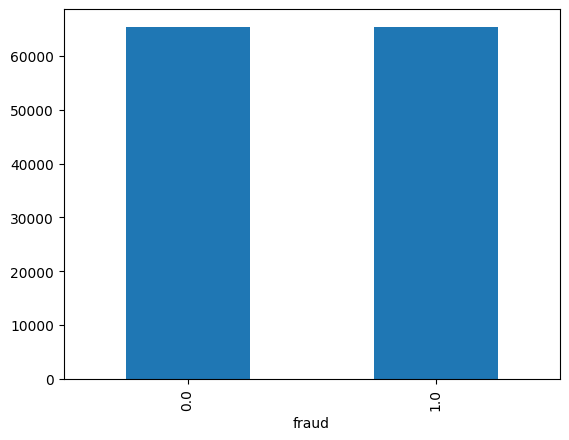

In [133]:
fraud_plt = train_under["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

In [134]:
X_train_under = train_under.drop(columns = ["fraud"])
y_train_under = train_under["fraud"]

In [135]:
log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

LogisticRegression()

In [136]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

/Users/javi/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228047
         1.0       0.58      0.95      0.72     21953

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



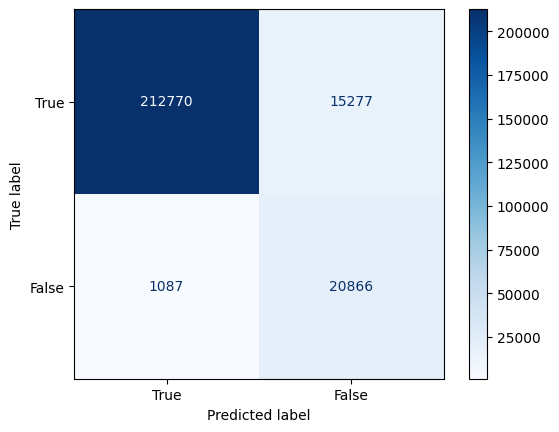

In [137]:
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[True, False])
disp.plot(cmap=plt.cm.Blues)

# SMOTE

In [138]:
sm = SMOTE(random_state = 1,sampling_strategy=1.0)

In [139]:
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)

In [140]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [141]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228047
         1.0       0.58      0.95      0.72     21953

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



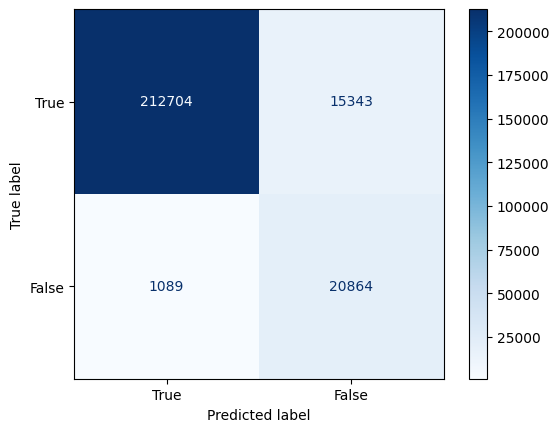

In [142]:
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[True, False])
disp.plot(cmap=plt.cm.Blues)

LogisticRegression without balancing

             precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    228047
         1.0       0.89      0.60      0.72     21953

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.95    250000

Oversample

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228137
         1.0       0.57      0.95      0.71     21863

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000

Undersample

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228137
         1.0       0.57      0.95      0.71     21863

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000

Smote

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228137
         1.0       0.57      0.95      0.71     21863

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000

The difference in the results in our balancing efforts are so inconsequential that we had to print out a  the confusion matrix of each method used in order to see the actual difference and Undersampling seems to be the winner just by a tiny margin compared to the rest.
At first glance the balancing doesn´t seem to improve at all the the results we are looking for.